<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

#### Analysis

In [8]:
import data_precleaning as dp
dp.generate_kickstarter_csv('data/Kickstarter_2019-08-15T03_20_03_022Z.json', 'dirty_data')

csv saved to data\dirty_data.csv


In [9]:
import pandas as pd
import data_cleaning as dc
dirty_data = pd.read_csv('./data/dirty_data.csv')
cleaned_data = dc.full_clean(dirty_data)

In [10]:
import success_metrics as sm
country_mean_pledge_rate = sm.pledge_rate_mean(cleaned_data)

In [11]:
import comparison_attribute as ca
trust_and_country_pledge_rate = ca.add_trustdata(country_mean_pledge_rate)

C:\Users\Kaleb\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
trust_and_country_pledge_rate

,Unnamed: 0,Backers,Goal,Pledged,Pledge Rate,Trust in others (%),Trust Bin
AU,103010.905744,103.554005,7.647694e+04,7289.199340,0.095312,54.43383,High
CA,104554.637668,125.714110,3.980993e+04,8425.711502,0.211648,41.11111,Low
CH,103644.348770,110.567294,3.550795e+05,16621.245901,0.046810,49.42904,High
DE,104235.078032,148.783150,6.076986e+04,13904.567973,0.228807,42.03041,High
ES,101514.757068,142.604696,3.855139e+04,11683.540668,0.303064,19.01944,Low
FR,104142.298214,146.139628,3.329725e+04,14123.552108,0.424166,18.65597,Low
GB,103626.996297,123.296446,1.997065e+04,9234.153880,0.462386,29.96146,Low
HK,103601.433302,250.620624,1.247535e+05,26279.273263,0.210650,48.33837,High
IT,104189.006620,97.218039,5.065724e+04,9111.350507,0.179863,28.25203,Low
JP,106977.739030,188.224018,2.085968e+06,18098.619180,0.008676,35.93942,Low


In [36]:
import hypothesis_tests as ht
hypothesis_tests = ht.hypothesis_test_one(alpha = 0.15, cleaned_data = trust_and_country_pledge_rate)

Based on the p value of 0.13447170637167355 and our alpha of 0.15 we reject the null hypothesis.

Due to these results, we can state that there is a difference between the pledge rate in high-trust and low-trust countries
with an effect size, cohen's d, of -0.76 and power of None.


In [44]:
def power_analysis(coh_d, dataset, alpha):
    from statsmodels.stats.power import TTestIndPower
    power_analysis = TTestIndPower()
    power = power_analysis.solve_power(effect_size=coh_d, nobs1=len(dataset), alpha=0.15)
    return power
power_analysis(coh_d=-0.76, dataset=trust_and_country_pledge_rate, alpha=0.15)

0.7704912379683824

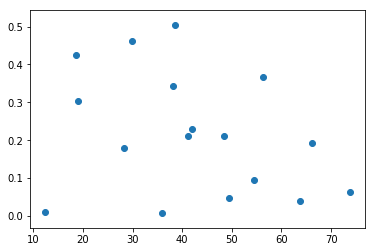

In [17]:
import matplotlib.pyplot as plt
plt.scatter(trust_and_country_pledge_rate['Trust in others (%)'], trust_and_country_pledge_rate['Pledge Rate'])

#### Findings & Application

#### Limitations

#### Next Steps

In [35]:
import importlib
importlib.reload(ht)

<module 'hypothesis_tests' from 'C:\\Users\\Kaleb\\Box\\GitHub\\mod3-hypothesis-testing\\hypothesis_tests.py'>